<a href="https://colab.research.google.com/github/SamikshaMulay-04/DL/blob/main/Practical4_autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# ---------------------------------------------
# a) Import Required Libraries
# ---------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Reshape
from tensorflow.keras.optimizers import Adam

# ---------------------------------------------
# b) Upload / Access the Dataset
# ---------------------------------------------
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize & Flatten
x_train = x_train.astype("float32") / 255.
x_test  = x_test.astype("float32") / 255.

x_train = x_train.reshape(len(x_train), 28*28)
x_test  = x_test.reshape(len(x_test), 28*28)

# ---------------------------------------------
# c) Encoder – Latent Representation
# ---------------------------------------------
encoder = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu')       # Latent space
])

# ---------------------------------------------
# d) Decoder – Reconstruct Input
# ---------------------------------------------
decoder = Sequential([
    Dense(64, activation='relu', input_shape=(32,)),
    Dense(128, activation='relu'),
    Dense(784, activation='sigmoid')
])

# Build Autoencoder
autoencoder = Sequential([encoder, decoder])

# ---------------------------------------------
# e) Compile the Model
# ---------------------------------------------
autoencoder.compile(optimizer=Adam(), loss='mse', metrics=['mse'])

# Train
history = autoencoder.fit(
    x_train, x_train,
    epochs=5,
    batch_size=256,
    validation_split=0.2
)

# Evaluate
loss, mse = autoencoder.evaluate(x_test, x_test)
print("Reconstruction MSE:", mse)

# ---------------------------------------------
# Simple Anomaly Detection
# (Higher reconstruction error → Anomaly)
# ---------------------------------------------
recon = autoencoder.predict(x_test)
recon_error = np.mean(np.abs(x_test - recon), axis=1)

threshold = np.percentile(recon_error, 95)   # top 5% considered anomaly
print("Threshold:", threshold)

anomalies = recon_error > threshold
print("Anomalies detected:", np.sum(anomalies))


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.1005 - mse: 0.1005 - val_loss: 0.0397 - val_mse: 0.0397
Epoch 2/5
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0361 - mse: 0.0361 - val_loss: 0.0288 - val_mse: 0.0288
Epoch 3/5
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0272 - mse: 0.0272 - val_loss: 0.0244 - val_mse: 0.0244
Epoch 4/5
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0233 - mse: 0.0233 - val_loss: 0.0218 - val_mse: 0.0218
Epoch 5/5
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0212 - mse: 0.0212 - val_loss: 0.0200 - val_mse: 0.0200
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0197 - mse: 0.0197
Reconstruction MSE: 0.019441956654191017
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Threshold: 0.084992744
Anomalies detected: 500


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


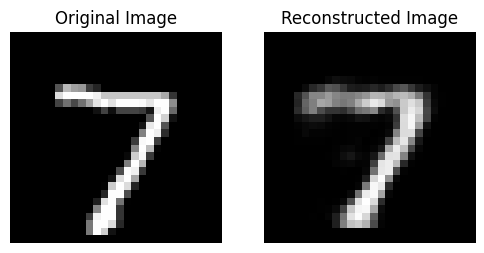

In [2]:

#  ADDED CODE: Show Original vs Reconstructed Image


import matplotlib.pyplot as plt

# Take one sample image from test set
sample_img = x_test[0]

# Reconstruct it using the autoencoder
reconstructed_img = autoencoder.predict(sample_img.reshape(1, 784))

# Reshape back to 28x28 for display
sample_img = sample_img.reshape(28, 28)
reconstructed_img = reconstructed_img.reshape(28, 28)

# Display Original and Reconstructed Image Side-by-Side
plt.figure(figsize=(6,3))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(sample_img, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Reconstructed Image")
plt.imshow(reconstructed_img, cmap='gray')
plt.axis('off')

plt.show()

